In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

load in dataset

In [7]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/Yu Lab/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


select variables that are important

In [8]:
df = df.iloc[:,[1,2,4,5,6,7,9,11]]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


check variable description

In [9]:
df.describe(), df[['Survived','Pclass','Sex','Embarked']].describe()

(         Survived      Pclass         Age       SibSp       Parch        Fare
 count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
 mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
 std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
 min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
 25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
 50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
 75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
 max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200,
          Survived      Pclass
 count  891.000000  891.000000
 mean     0.383838    2.308642
 std      0.486592    0.836071
 min      0.000000    1.000000
 25%      0.000000    2.000000
 50%      0.000000    3.000000
 75%      1.000000    3.000000
 max      1.000000    3.000000)

check variable correlation

(          Survived    Pclass       Age     SibSp     Parch      Fare
 Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
 Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
 Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
 SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
 Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
 Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000,
 <matplotlib.axes._subplots.AxesSubplot at 0x2204b74ee08>)

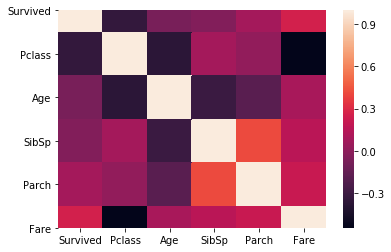

In [11]:
# correlation
cor = df.corr()
cor, sns.heatmap(cor)

check missing data, fill in missing data and check again

In [12]:
# check missing value
pd.isnull(df).sum() > 0

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [13]:
# fill in missing value and check again
df["Age"] = df.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))
df['Embarked'] = df.groupby('Pclass')['Embarked'].apply(lambda x:x.fillna(x.value_counts().index.tolist()[0]))
pd.isnull(df).sum() > 0

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

create dummy variables for categorical variables

In [14]:
# encoding: create dummy variable
enc = OneHotEncoder(handle_unknown='ignore')
edf = pd.DataFrame(enc.fit_transform(df[['Pclass','Sex','Embarked']]).toarray())
edf.columns = enc.get_feature_names(['Pclass','Sex','Embarked'])
edf.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [15]:
df.drop(['Pclass','Sex','Embarked'] ,axis=1, inplace=True)
df= pd.concat([df, edf ], axis=1)
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


split train and test dataset

In [16]:
# split x and y
y = df.Survived
x = df.drop(['Survived'], axis = 1)
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size = 0.3, stratify = y)

normalize numerical variables

In [17]:
# normalize age
scaler = StandardScaler()
xtrain.iloc[:,[0,3]] = scaler.fit_transform(xtrain.iloc[:,[0,3]])
xtest.iloc[:,[0,3]] = scaler.transform(xtest.iloc[:,[0,3]])

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


build random forest model

In [18]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 42)
classifier.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

test model performance on test data

In [19]:
ypred = classifier.predict(xtest)
confusion_matrix(ytest, ypred)

array([[144,  21],
       [ 32,  71]], dtype=int64)

In [20]:
classifier.score(xtest,ytest) # accuracy

0.8022388059701493

In [21]:
report = pd.DataFrame(classification_report(ytest, ypred,output_dict=True))
report

,0,1,accuracy,macro avg,weighted avg
precision,0.818182,0.771739,0.802239,0.794960,0.800333
recall,0.872727,0.689320,0.802239,0.781024,0.802239
f1-score,0.844575,0.728205,0.802239,0.786390,0.799851
support,165.000000,103.000000,0.802239,268.000000,268.000000


check feature importance

In [22]:
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = df.columns[1:],
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances # gini impurity

,importance
Age,0.268643
Fare,0.229567
Sex_male,0.169896
Sex_female,0.104131
Pclass_3,0.059056
SibSp,0.046010
Pclass_1,0.044589
Parch,0.035552
Embarked_C,0.016050
Embarked_S,0.013871


cross validation

In [23]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [3, 4, 5, 6, 7],
 'min_samples_split': [2, 4, 6, 8, 10],
 'n_estimators': [100,110, 120,130, 140, 150,160, 170, 180,190, 200]}

In [24]:
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
search = rf_random.fit(xtrain,ytrain)
best = search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   50.6s finished
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
# bets score and best parameters
search.best_score_, best

(0.8346709470304976,
 {'n_estimators': 140,
  'min_samples_split': 8,
  'min_samples_leaf': 4,
  'max_features': 'sqrt',
  'max_depth': 60,
  'bootstrap': False})

refit model with best hyperparameters and check model performance again

In [26]:
search.best_score_, best# apply best parameters and get model scores
best_model = RandomForestClassifier(n_estimators= 140,
  min_samples_split= 8,
  min_samples_leaf= 4,
  max_features='auto',
  max_depth= 60,
  bootstrap=False)
best_model.fit(xtrain, ytrain)
ypred = best_model.predict(xtest)
pd.DataFrame(classification_report(ytest, ypred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.836158,0.813187,0.828358,0.824673,0.827330
recall,0.896970,0.718447,0.828358,0.807708,0.828358
f1-score,0.865497,0.762887,0.828358,0.814192,0.826061
support,165.000000,103.000000,0.828358,268.000000,268.000000


Predict new data

In [27]:
# load in new dataset
test = pd.read_csv('C:/Users/Lenovo/Desktop/Yu Lab/titanic/test.csv')
test = test.iloc[:,[1,3,4,5,6,8,10]]
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [28]:
# check missing value
pd.isnull(test).sum() > 0

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

In [29]:
# fill in missing data and check again
test["Age"] = test.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))
test["Fare"] = test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
pd.isnull(test).sum() > 0

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [30]:
# encoding: create dummy variable
tenc = OneHotEncoder(handle_unknown='ignore')
tedf = pd.DataFrame(tenc.fit_transform(test[['Pclass','Sex','Embarked']]).toarray())
tedf.columns = tenc.get_feature_names(['Pclass','Sex','Embarked'])
tedf.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [31]:
# replace original variable with the new dummy variables
test.drop(['Pclass','Sex','Embarked'] ,axis=1, inplace=True)
test= pd.concat([test, tedf ], axis=1)
test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [32]:
# normalize age and fare variable
scaler = StandardScaler()
test.iloc[:,[0,3]] = scaler.fit_transform(test.iloc[:,[0,3]])
test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.393048,0,0,-0.497071,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.356309,1,0,-0.511934,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2.512223,0,0,-0.463762,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.184909,0,0,-0.482135,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.570214,1,1,-0.417159,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [33]:
# make prediction
ytpred = best_model.predict(test)
ytpred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

predict one observation at a time

In [41]:
newdf = {"Age":[(30-x.Age.mean())/x.Age.std()], "SibSp":[1],"Parch":[0],"Fare":[(70-x.Fare.mean())/x.Fare.std()],
      "Pclass_1":[0],"Pclass_2":[1],"Pclass_3":[0],
      "Sex_female":[0],"Sex_male":[1],"Embarked_C":[0],"Embarked_Q":[0],"Embarked_S":[1]}
newdf = pd.DataFrame(newdf)
ynewpred = best_model.predict(newdf)
ynewpred

array([0], dtype=int64)